<a href="https://colab.research.google.com/github/wgong/py4kids/blob/master/Imagination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

A while back I was taking an applied math course that had a few sections dedicated to complex analysis.(Which, by the way, is a really cool branch of math and has uses everywhere.) One day some fellow students and I were working on some classwork when  one of them, let's call him Steve, decided he needed to figure out what $i^i$ evaluated to. OK, so how is this done? Lets first lay out some of the basics of complex numbers.

First of all, any complex number can be written as $$z = x + iy$$ where $x$ and $y$ are both ordinary real numbers. Now, imagine a simple plot with $x$ on the horizontal axis and $y$ on the vertical axis. Here is a simple example implementation of such a plot. The plot shows the complex numbers $$1+1i , 2i , 0$$

In [0]:
# import matplotlib
# import matplotlib.pyplot as plt
import numpy as np
from pylab import *
%matplotlib inline

In [0]:
# matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']
def complex_plot(data, style = 'ro', lims = None):
    figure(figsize=(10,10))
    # fig = plt.figure(figsize=(10,10))
    # fig = plt.gcf()
    # fig.set_size_inches(10, 10)
    xlabel('x')
    ylabel('y')
    xs = [z.real for z in data]
    ys = [z.imag for z in data]
    if lims is None:
        xlim((min(xs)-1,max(xs)+1))
        ylim((min(ys)-1,max(ys)+1))
    else:
        xlim(lims[0])
        ylim(lims[1])
    grid()
    plot(xs,ys,style)


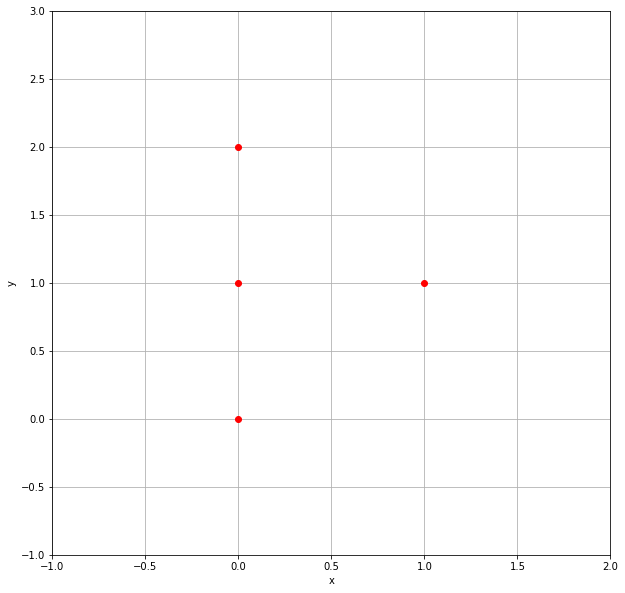

In [16]:
complex_plot([1 + 1j, 2j, 0, 1j])

Ok, so we can plot complex numbers in a plane. Cool. Now you may be aware that there are different coordinate systems for plotting points in a plane. The representation using $x$ and $y$ is called the Cartesian system. Another useful system in this context is what is referred to as polar coordinates. In this system, you specify a distance from the origin and an angle measured from the positive x-axis towards the positive y-axis. We call the distance $r$ and the angle $\theta$. For example, the complex number $1 + i$ would have $r=\sqrt{2}$ and $\theta=\frac{\pi}{4}$ , and the real number $3$ would have $r=3$ and $\theta=0$. The relations between this coordinate system can be deduced from basic trigonometry using the Pythagorean Theorem, and the soh-cah-toa rules. But anyway, here they are: 
$$x = r\cos{\theta}$$
$$y = r\sin{\theta}$$
$$r = \sqrt{x^2 + y^2}$$
$$\theta = atan2(y,x)$$

I've specified the $atan2(y,x)$ function over the standard $atan(\frac{y}{x})$ that you see in math because this makes sure to get the angle in the right quadrant. 

So what's the point of all this. Well, using this coordinate system, you can write a complex number as a product of things involving your two coordinates, rather than as a sum. Let me show you what I mean. 

Suppose we have a complex number $$z = x + iy.$$ 
Now, use the relations above to translate this into polar coordinates. 
This gives $$z = r\cos{\theta} + ir\sin{\theta} = r(\cos{\theta} + i\sin{\theta})$$ 
Then using [Euler's formula](http://en.wikipedia.org/wiki/Euler%27s_formula) 
$$ e^{i\theta} = \cos{\theta} + i\sin{\theta}$$ 
we get $$z = re^{i\theta}.$$ Which is the standard was to represent complex numbers in polar coordinates.

We are almost ready to address our original question(What is $i^i$?) But we need a few more little primers. First, how to you handle logarithms of complex numbers?
Meaning what is $$\ln(x + iy)$$ Well, if we write it as $$\ln(re^{i\theta})$$ we can use a property of logarithms, namely $$\ln(AB)=\ln(A) + \ln(B)$$ to get 
$$\ln(re^{i\theta}) = \ln(r) + \ln(e^{i\theta}) = \ln(r) + i\theta$$
Technically, we should also add a $2\pi{n}i$ to this because $\theta$ is cyclic. 
Meaning, $\theta$ and $\theta + 2\pi{n}$ are equivalent. However, let's just choose $n=0$ for now and get on with it. 

That should be everything. Hang on to your hats, shit's about to get real.

We have, 
$$z = i^i$$
or equivalently,
$$z =\exp(\ln(i^i)) $$
Now, logarithms have another sort of strange property. It is
$$\ln(x^y) = y\ln(x)$$
Applying that here yields
$$z = \exp(i\ln(i)) $$
However, we can find from Euler's formula that $i = e^{i\pi/2}$. So replacing the $i$ inside the logarithm gives
$$z = \exp(i\ln(e^{i\pi/2})) = \exp(i(i\pi/2)) = \exp(-\pi/2)$$ which is *real*. Let that sink in for a second. $i^i $ is a real number. 

Our little group was by no means the first to discover this little gem, but I was curious to see if Python's complex number class handled this. 

#Imagining in Python

In [17]:
1j**1j

(0.20787957635076193+0j)

In [18]:
exp(-pi/2)

0.20787957635076193

Well, looks like it does. End of story, right? Well, no. I wanted to see how far I could push this so I thought I would see what happens when you stack up three $i$'s. 

In [19]:
i = 1j
i**(i**i)

(0.9471589980723784+0.32076444997930853j)

Hmm. That's not very interesting. How about

In [20]:
(i**i)**i

(6.123233995736766e-17-1j)

Hmm, that's kind of interesting. Almost exactly $-i$. What if we keep going?

[0.00000000e+00+1.00000000e+00j 2.07879576e-01+0.00000000e+00j
 6.12323400e-17-1.00000000e+00j 4.81047738e+00+9.01820064e-33j
 6.12323400e-17+1.00000000e+00j 2.07879576e-01+3.89711785e-34j
 6.12323400e-17-1.00000000e+00j 4.81047738e+00+9.01820064e-33j
 6.12323400e-17+1.00000000e+00j 2.07879576e-01+3.89711785e-34j]


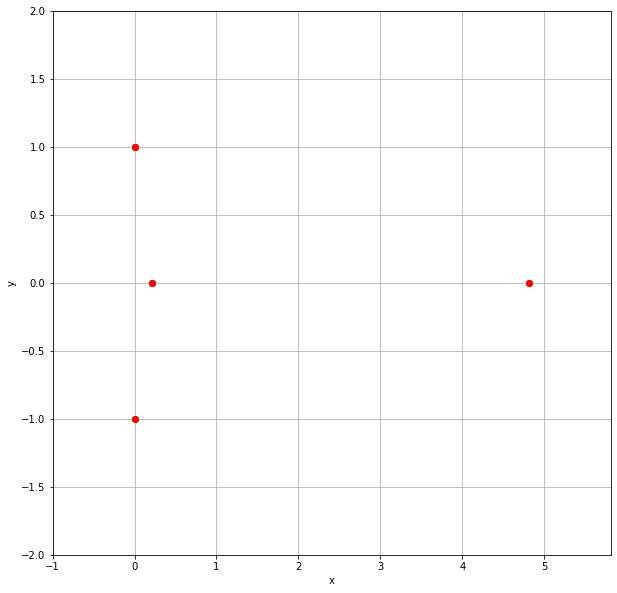

In [21]:
n = 10
zs = zeros(n, dtype = complex)
zs[0] = i
for ind in range(1,n):
    zs[ind] = zs[ind-1]**i
print(zs)
complex_plot(zs)

Now this is interesting. Look at the fifth element in the zs array and compare it to the first. They are within rounding error of each other. This means that there is a cycle here! In fact, it can be proven that there is a cycle by working out (((i^i)^i)^i)^i and showing that it is exactly i. Neat! 

Now, this was what happened when we evaluated the "tower" of $i$'s from the bottom up. What happens when we evaluate it from the top going down?  

[0.        +1.j         0.20787958+0.j         0.947159  +0.32076445j
 0.05009224+0.60211653j 0.38716618+0.03052708j] 
... ...
 [0.43927338+0.3610952j  0.43737588+0.36098873j 0.43852323+0.35974365j
 0.43873138+0.36123921j 0.43758406+0.36053467j]


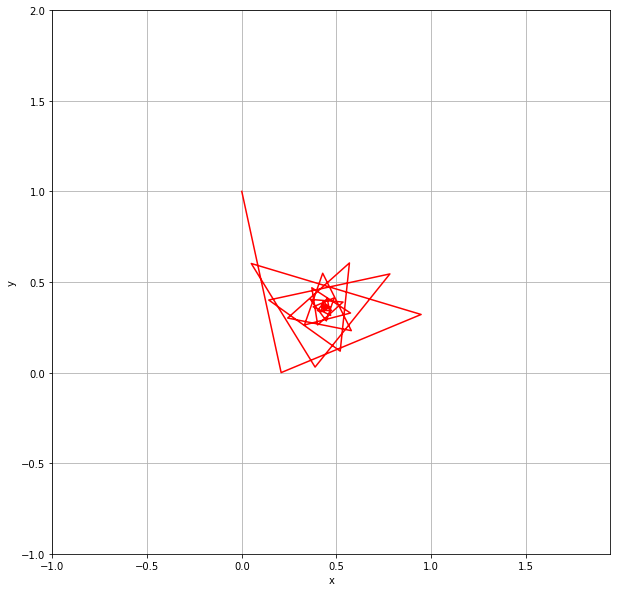

In [22]:
n = 60
zs = zeros(n, dtype = complex)
zs[0] = i
for ind in range(1,n):
    zs[ind] = i**(zs[ind-1])
print(zs[:5],'\n... ...\n',zs[-5:])
complex_plot(zs, style='-r')

Hmm. Well, look at that. It seems that we don't have a cycle in this method of evaluation, but rather with further iterations we spiral into some sort of convergence point in the area of $0.435+0.339i$. This got me thinking. If a tower consisting of $i$'s converges to this point. Will a tower consisting of, say $\frac{i}{2}$'s converge to the same point?

[0.        +0.5j        0.42882901-0.15487175j 0.67292815+0.66697063j
 0.1822293 +0.12326347j 0.71160528+0.1448463j ] 
... ...
 [0.43649906+0.24694208j 0.43644733+0.2467064j  0.43660433+0.24684245j
 0.43642595+0.24682932j 0.43655582+0.24674659j]


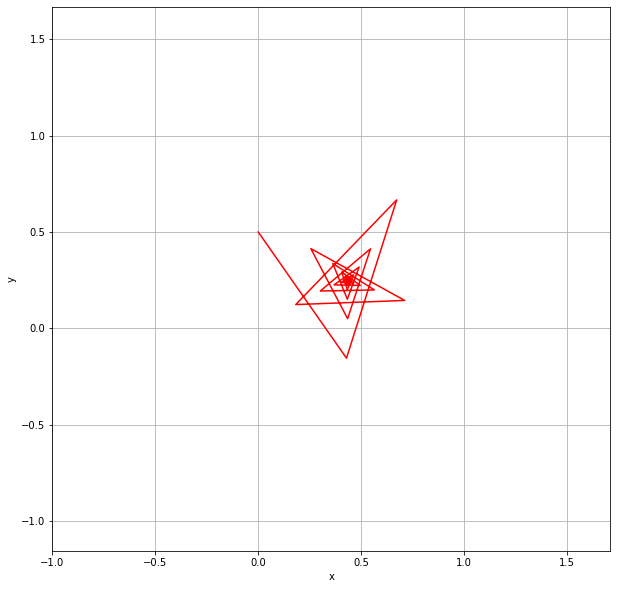

In [23]:
zs = zeros(n, dtype = complex)
zs[0] = i/2
for ind in range(1,n):
    zs[ind] = (i/2)**(zs[ind-1])
print(zs[:5],'\n... ...\n',zs[-5:])
complex_plot(zs, style='-r')

Nope, This time it converges to $0.437+0.247i$. Interesting. 

#Let Your Imagination Run Wild!

Let's define a function that we'll call $I(s)$ that takes a pure imaginary number as it's argument, $s$, and spits out a complex number that is the convergence point from the above. I call it the imagination function. Formally, we could define it something like
$$\large I(s) = \lim_{n \to \infty} \zeta_n := s^{\zeta_{n-1}} ; \zeta_0=s$$

Do you like this notation? I made it up just now :). All I mean is that $I(s)$ is the limit of applying the mapping indicated by $:=$ an infinite number of times. Let's try to figure out what $I(s)$ looks like.

In [0]:
def I(s, n = 100):
    ret = s.copy()
    for _ in range(n):
        ret = pow(s,ret)
    return ret

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in cdouble_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in cdouble_scalars
  after removing the cwd from sys.path.


(-2, 2)

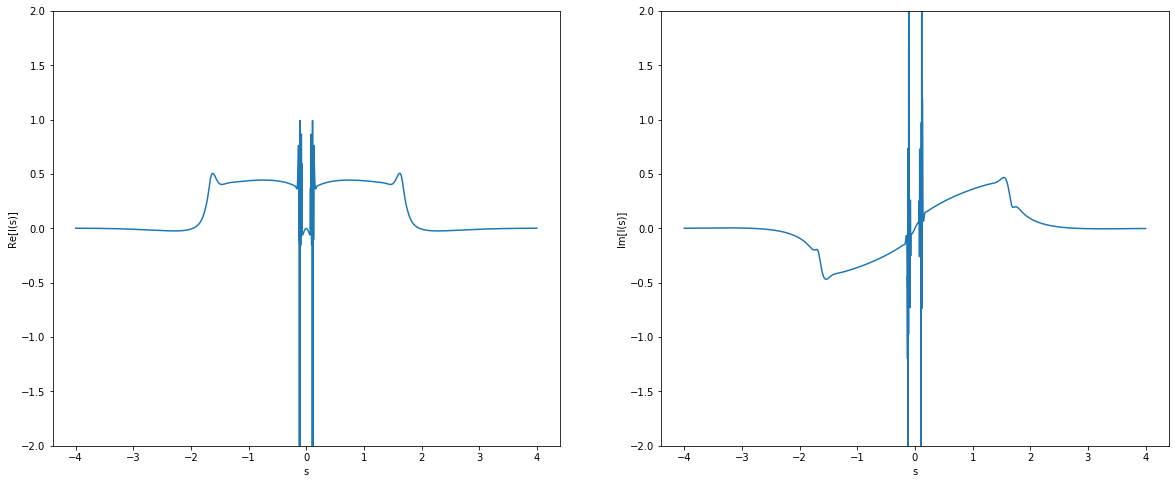

In [45]:
n = 5000
ss = linspace(-4j,4j,n)
Is = zeros(n,dtype=complex)
for ind in range(n):
    Is[ind] = I(ss[ind])

figure(figsize=(20,8))
subplot(1,2,1)
# fig = plt.gcf()
# fig.set_size_inches(10, 10)

xlabel('s')
ylabel('Re[I(s)]')
plot(ss.imag, Is.real)
ylim((-2,2))

subplot(1,2,2)
# figure(figsize=(10,10))
# fig = plt.gcf()
# fig.set_size_inches(10, 10)
xlabel('s')
ylabel('Im[I(s)]')
plot(ss.imag, Is.imag)
ylim((-2,2))

A few observations, 
* The real part of $I(s)$ looks to be symmetric.
* The imaginary part is anti-symmetric.
* There is some crazy shit happening in the vicinity of $\pm0.1$. I had to set the bounds manually because in that area the function screams off to something like $10^{38}$. For some reason, it diverges there. 

Let's take a closer look at the divergent feature at $0.1$.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in cdouble_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in cdouble_scalars
  after removing the cwd from sys.path.


(-2, 2)

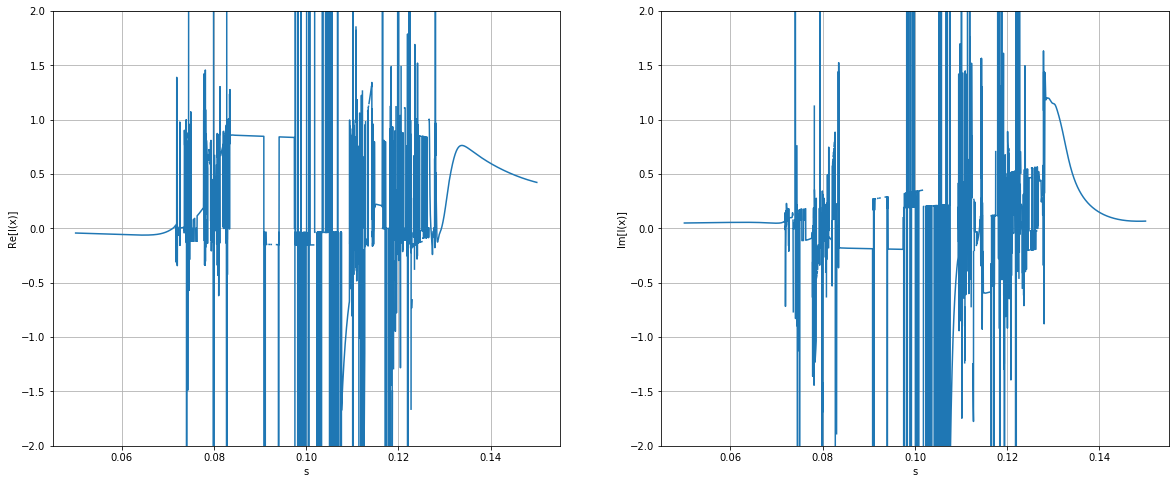

In [44]:
n = 5000
ss = linspace(0.05j,0.15j,n)
Is = zeros(n,dtype=complex)
for ind in range(n):
    Is[ind] = I(ss[ind])

figure(figsize=(20,8))
subplot(1,2,1)
# fig = plt.gcf()
# fig.set_size_inches(10, 10)
xlabel('s')
ylabel('Re[I(x)]')
grid()
plot(ss.imag, Is.real)
ylim((-2,2))

subplot(1,2,2)
# figure(figsize=(10,10))
# fig = plt.gcf()
# fig.set_size_inches(10, 10)
xlabel('s')
ylabel('Im[I(x)]')
grid()
plot(ss.imag, Is.imag)
ylim((-2,2))



Yup, looks pretty crazy to me. At first blush I had no explaination for this, but I had a few theories.
1.  It's the result of some numerical instability. 
2.  It's *chaos*. Chaos has been known to exist in mappings. The [logistic map](http://en.wikipedia.org/wiki/Logistic_map) is an archetypal example of this.
3.  The function is simply divergent at some places in this range. However, it's worth noting that there appears to be areas of convergence intersperced in here as well.

Well, before we pass judgement or call it quits, lets try something else...

#And the Wheels Fall Off...


Just for fun, lets see if we can extend the imagination function from purely imaginary arguments to complex arguments with non-zero real parts.

In [0]:
def I_2D(limits, iterations):
    from matplotlib.colors import BoundaryNorm

    xmin, xmax = limits[0]
    ymin, ymax = limits[1]

    # make these smaller to increase the resolution
    dx, dy = (xmax - xmin)/500, (ymax - ymin)/500

    # generate 2 2d grids for the x & y bounds
    y, x = mgrid[slice(ymin, ymax + dy, dy),
                 slice(xmin, xmax + dx, dx)]

    z = I(x + 1j*y, n = iterations)
    z = z[:-1, :-1]
    levels = linspace(-1,1,100)
    cmap = plt.get_cmap('PiYG')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    figure(figsize=(20,8))
    subplot(1,2,1)
    # fig = plt.gcf()
    # fig.set_size_inches(10, 10)
    pcolormesh(x, y, z.real, cmap=cmap, norm=norm)
    colorbar()
    xlim((xmin, xmax))
    ylim((ymin, ymax))
    xlabel('Re[s]')
    ylabel('Im[s]')
    title('Re[I(s)]')
    
    # figure(figsize=(10,10))
    # fig = plt.gcf()
    # fig.set_size_inches(10, 10)

    subplot(1,2,2)
    pcolormesh(x, y, z.imag, cmap=cmap, norm=norm)
    colorbar()
    xlim((xmin, xmax))
    ylim((ymin, ymax))
    xlabel('Re[s]')
    ylabel('Im[s]')
    title('Im[I(s)]')
    return z

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


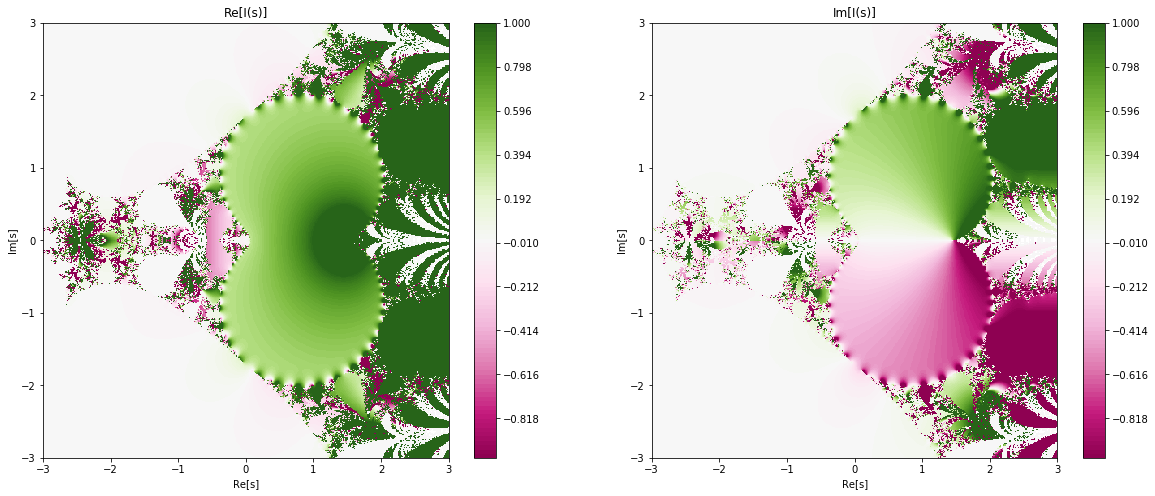

In [40]:
iter_100 = I_2D(((-3,3),(-3,3)), 100)

Well, ahhhh... that's...interesting. I don't know what I was expecting, but it wasn't this. Here we were just trying to use our imaginations, and fucking fractals show up.

But wait, there's more! It get's even crazier. Look what happens if you iterate 101 times instead of 100.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


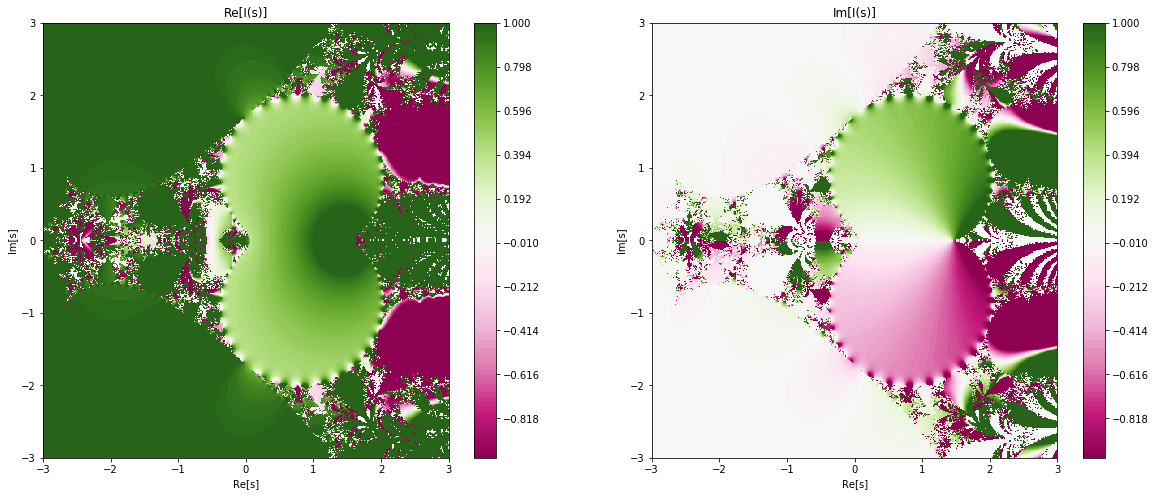

In [41]:
iter_101 = I_2D(((-3,3),(-3,3)), 101)

It's different. I guess that makes sense. After all, if $I(s)$ doesn't converge somewhere, it will most certainly change it's value from one iteration to the next. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


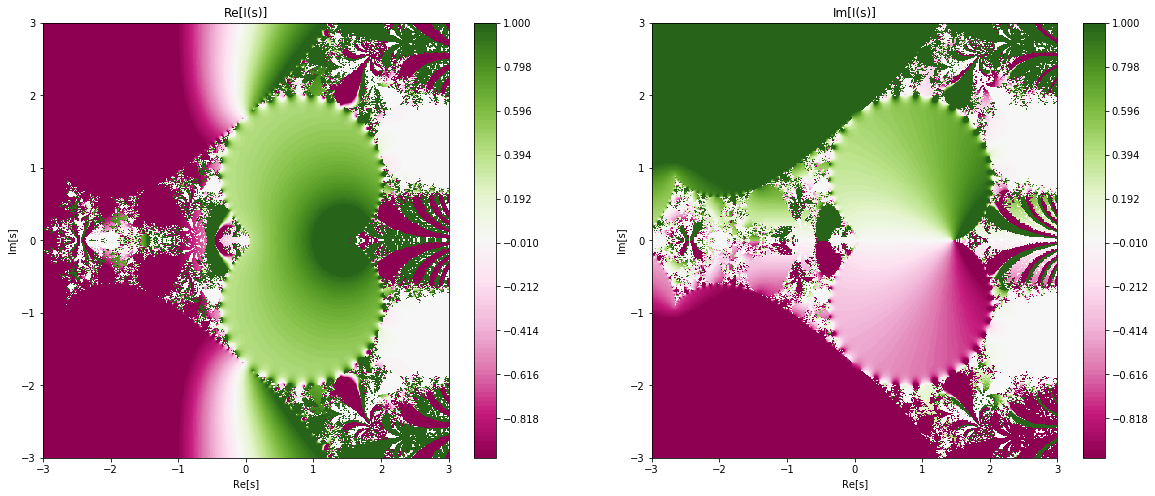

In [42]:
iter_102 = I_2D(((-3,3),(-3,3)), 102)

OK, this is all fine, but let's try to get a feel for how much the function changes upon iteration.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


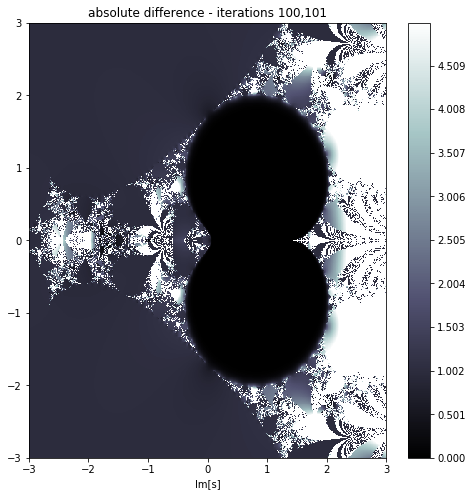

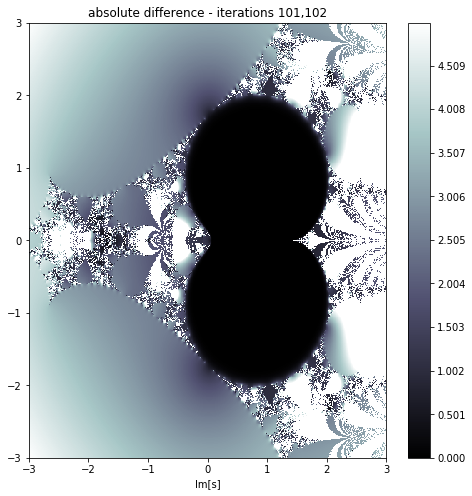

In [43]:
def plot_iter_diff(iter_0, iter_1, title_):
    from matplotlib.colors import BoundaryNorm
    from numpy import isnan
    xmin, xmax = (-3,3)
    ymin, ymax = (-3,3)

    # make these smaller to increase the resolution
    dx, dy = (xmax - xmin)/500, (ymax - ymin)/500

    # generate 2 2d grids for the x & y bounds
    y, x = mgrid[slice(ymin, ymax + dy, dy),
                 slice(xmin, xmax + dx, dx)]

    z = abs(iter_0 - iter_1)
    mask = isnan(z)
    z[mask] = 100000
    levels = linspace(0,5,500)
    cmap = plt.get_cmap('bone')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    figure(figsize=(8,8))
    # fig = plt.gcf()
    # fig.set_size_inches(10, 10)


    pcolormesh(x, y, z, cmap=cmap, norm=norm)
    colorbar()
    xlabel('Re[s]')
    xlabel('Im[s]')
    title(title_)
    xlim((xmin, xmax))
    ylim((ymin, ymax))
plot_iter_diff(iter_100, iter_101, 'absolute difference - iterations 100,101')
plot_iter_diff(iter_101, iter_102, 'absolute difference - iterations 101,102')

Then I remembered something Steve(the same from before) had talked about on a different ocassion: *"Power Towers"*. Power towers, or more formally, tetration, are an extension of the sequence: addition->multiplication(repeated addition)->exponentiation(repeated multiplication)--->tetration(repeated exponentiation). 

So I did a quick search and found the wiki page for [tettration](http://en.wikipedia.org/wiki/Tetration). Go ahead, have a look, scroll down to the section titled **"Extension to complex bases"**. Look familiar? 

Quoting from the article:

>Such tetration sequences have been studied since the time of Euler but are poorly understood due to their chaotic behavior. Most published research historically has focused on the convergence of the power tower function. Current research has greatly benefited by the advent of powerful computers with fractal and symbolic mathematics software. Much of what is known about tetration comes from general knowledge of complex dynamics and specific research of the exponential map.

Well, looks like we somehow stumbled upon an area of active research. Good job, everybody! 